# Oficina 8

##  Introdução e Objetivo

**Nessa análise foi explorado o dataset do seaborn `mpg` com o objetivo de encontrar padrões entre multiplas variáveis. Para isso é utilizado técnicas de visualizações com distribuições conjuntas de variáveis quantitativas**

## 0.0 - Importações

### 0.1 - Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 0.2 - Importando dataset

In [49]:
df_mpg = sns.load_dataset('mpg')

## 1.0 - Análises

### 1.1 - Análise exploratória

In [50]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [51]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


**Modificar os nomes das colunas**

In [52]:
new_names = {'mpg':'gpm', 'cylinders':'cilindros', 'displacement':'cilindradas', 'horsepower':'cavalos de potência', 'weight':'peso',
            'acceleration':'aceleração', 'model_year': 'ano do modelo', 'origin':'origem', 'name':'modelo'}
df_mpg.rename(new_names, axis=1, inplace=True)

In [53]:
df_mpg.head()

,gpm,cilindros,cilindradas,cavalos de potência,peso,aceleração,ano do modelo,origem,modelo
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


**Abaixo é utilizado o método `pairplot` para encontrar alguns padrões nos dados**

C:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


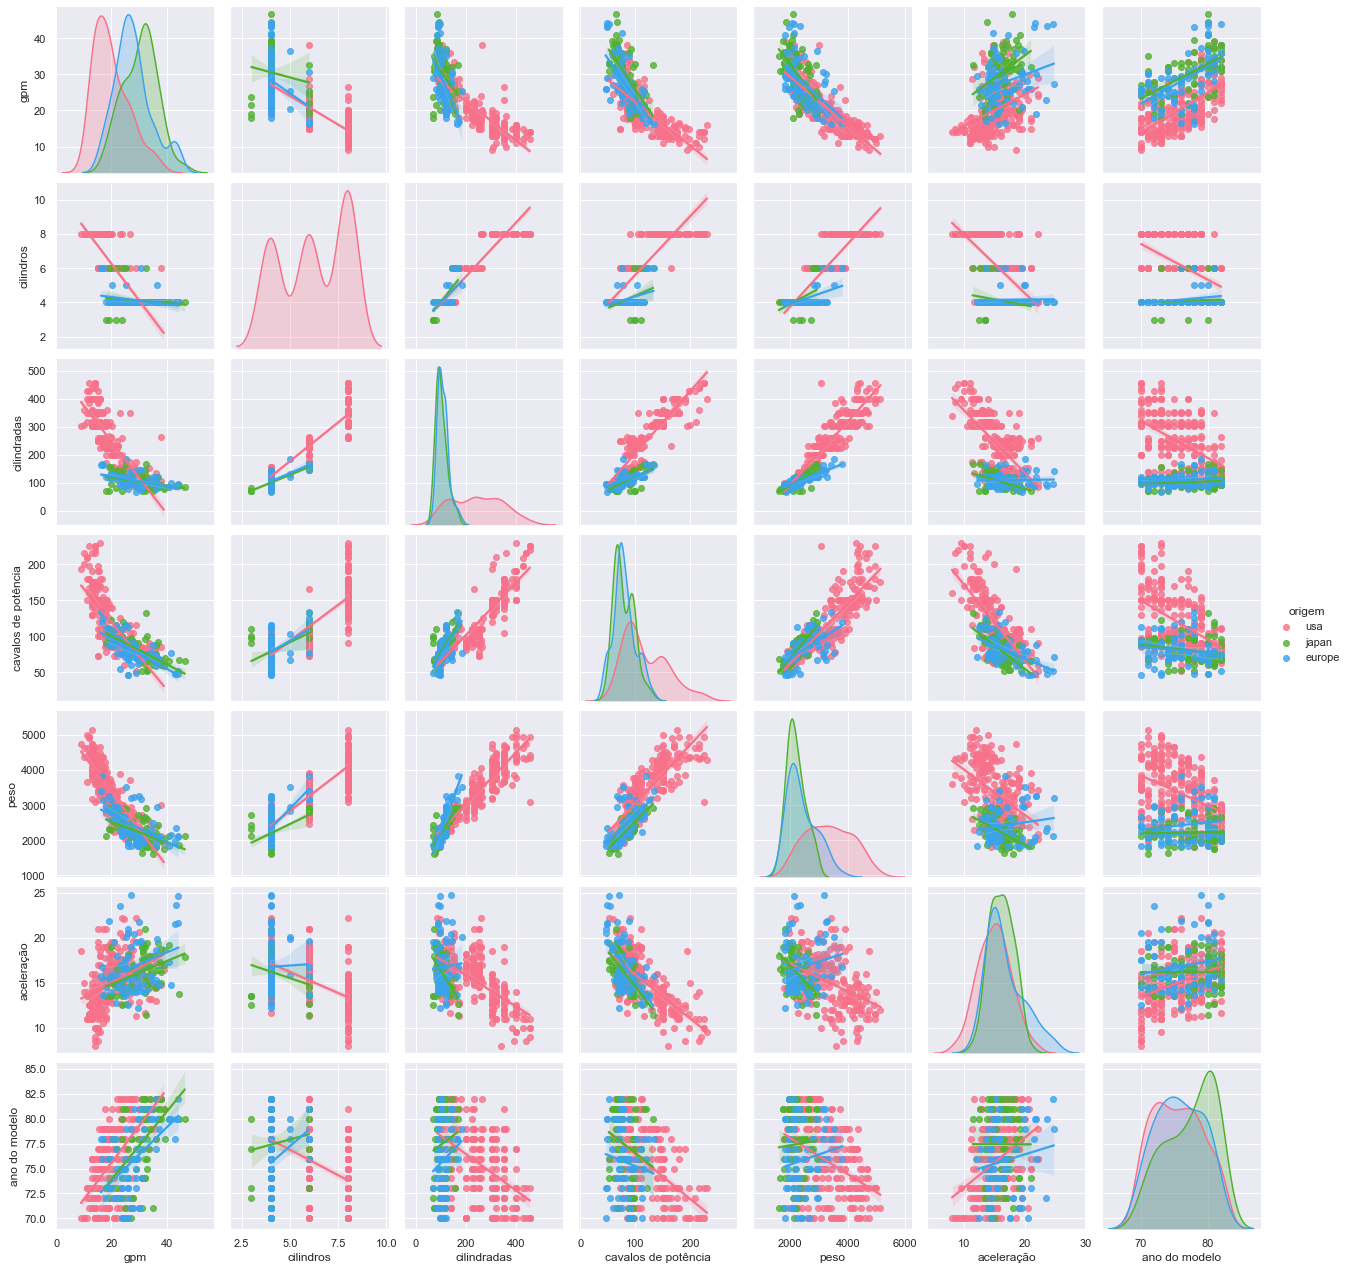

In [54]:
sns.pairplot(kind='reg', diag_kind='kde', hue='origem', palette = 'husl', data=df_mpg)
plt.show()

In [55]:
df_mpg.corr()

,gpm,cilindros,cilindradas,cavalos de potência,peso,aceleração,ano do modelo
gpm,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cilindros,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
cilindradas,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
cavalos de potência,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
peso,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
aceleração,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
ano do modelo,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


**Análise**

Variáveis com maior correlação entre si:
- cilindros
    - cilindradas
    - cavalos de potência
    - peso
- cilindradas
    - cilindros
    - cavalos de potência
    - peso
- cavalos de potência
    - cilindros
    - cilindradas
    - peso
- peso
    - cilindros
    - cilindradas
    - cavalos de potência

**Avaliando Cilindradas por Cavalos de Potência**

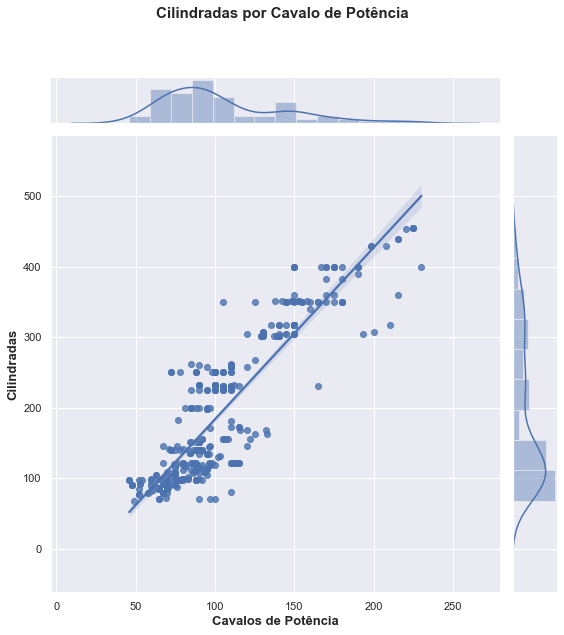

In [64]:
sns.set(style="darkgrid")

graph = sns.jointplot(x='cavalos de potência', y='cilindradas', kind='reg', height= 8, ratio = 8, data=df_mpg)

graph.fig.suptitle('Cilindradas por Cavalo de Potência', x=0.5, y=1.1, fontsize=15, fontweight='bold')
graph.ax_joint.set_xlabel('Cavalos de Potência', fontsize=13, fontweight='bold')
graph.ax_joint.set_ylabel('Cilindradas', fontsize=13, fontweight='bold')
graph.fig.tight_layout()

plt.show()


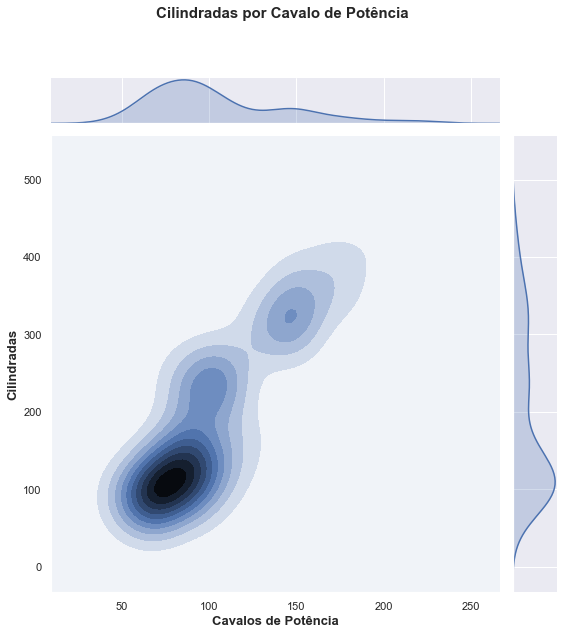

In [67]:
# Definindo o estilo do gráfico
sns.set(style="darkgrid")

# Criando gráfico
graph = sns.jointplot(x='cavalos de potência', y='cilindradas', kind='kde', height=8, ratio=8, data=df_mpg)

# Personalização do gráfico
graph.fig.suptitle('Cilindradas por Cavalo de Potência', x=0.5, y=1.1, size=15, weight='bold') # Definindo título
graph.set_axis_labels('Cavalos de Potência', 'Cilindradas', size=13, weight='bold') # define x e y de uma vez

# outras formas de dar nome as labels
# graph.ax_joint.set_xlabel('Cavalos de Potência', size=13, weight='bold')
# graph.ax_joint.set_ylabel('Cilindradas', size=13, weight='bold')

graph.fig.tight_layout() # Labels são ajustados para fora da área de plotagem

plt.show()

**Análise**

Podemos observar no gráfico de distribuição conjunta com reta de regressão que há uma forte tendência de crescimento entre as variáveis, sendo essa uma alta correlação positiva, indicando que, possivelmente há uma relação positiva entre o aumento de cilindradas e o aumento de cavalos de potência.

Podemos observar também, no gráfico de de distribuição probabilistica que dentre os dados analisados, há maior probabilidade de encontrar carros com cilindradas e cavalos de potência mais baixos.